# Heatmaps for all biomes, and for human tissues
* Also tree enrichment
* Also graphs for % pfam identity - didn't end up using as figure

In [51]:
def read_in_data_filter_integer_labels(grouped = 30,
                        csv = "/global/cfs/cdirs/kbase/KE-Catboost/HK/mode_0/copy_number_abundance.csv"):
    df = pd.read_csv(csv)
    df = df.drop('Unnamed: 0', axis=1)
    df = df.fillna(0)

    grouped_df = df.groupby('biome').filter(lambda x : len(x) > grouped)
    grouped_df = grouped_df.reset_index(drop=True)
    print(grouped_df['biome'].nunique())

    
    # drop constant columns
    print(grouped_df.shape)
    # record columns to delete
    counts = grouped_df.nunique()
    to_del = [i for i,v in enumerate(counts) if v == 1]
    print('constant columns: ',to_del)
    # drop useless columns
    grouped_df.drop(grouped_df.columns[[to_del]],axis = 1, inplace=True)
    print(grouped_df.shape)
    return grouped_df

In [52]:
cluster = read_in_data_filter_integer_labels()

74
(16121, 14992)
constant columns:  []


/global/common/software/nersc/cori-2022q1/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


(16121, 14992)


In [54]:
cluster_grouped = cluster.groupby('biome').sum()

In [55]:
name = cluster_grouped.reset_index().biome

In [56]:
log_test = np.log2(cluster_grouped.transpose())
log_test.replace([np.inf, -np.inf], np.nan, inplace=True)
log_test.fillna(0.0, inplace=True)
log_test = log_test.loc[:,~(log_test.sum(axis=0) == 0)]

/global/common/software/nersc/cori-2022q1/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


In [15]:
import sys
sys.setrecursionlimit(2000)

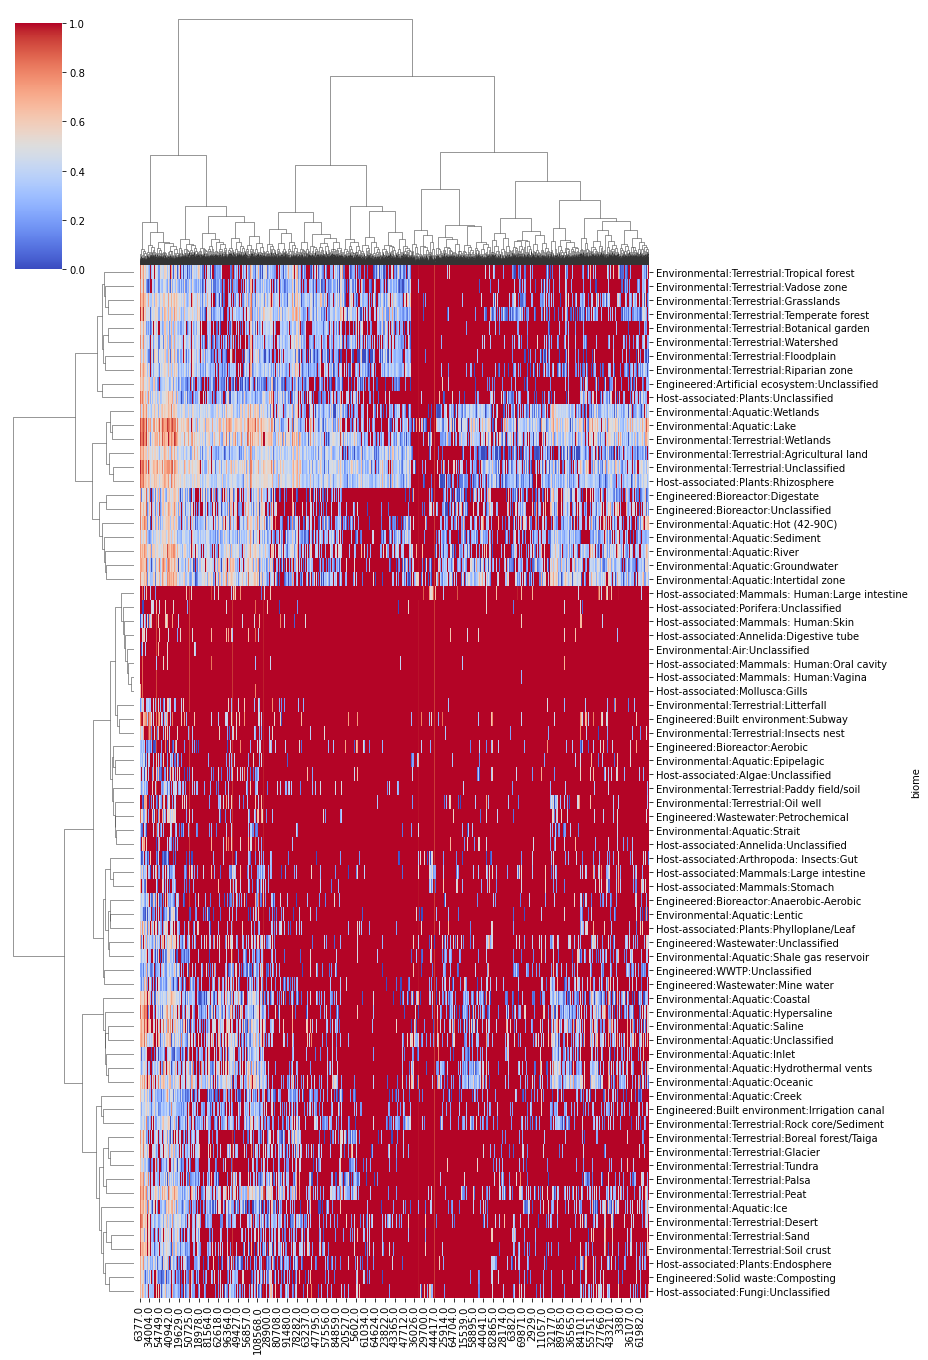

In [82]:
clustermap = sns.clustermap(log_test.transpose(),
               method='ward', #yticklabels=name,
               standard_scale=1,
                            cmap="coolwarm",figsize=(13,19))
clustermap

# Cluster heatmap for human centered tissues

In [6]:
hh = pd.read_csv("/global/cfs/cdirs/kbase/KE-Catboost/HK/mode_0/copy_number_abundance.csv")
hh = hh.drop(['Unnamed: 0',],axis=1)

cds = pd.read_csv("/global/cfs/cdirs/kbase/KE-Catboost/HK/IMG_dataset_Sean_Filtered.csv")
cds['GOLD Analysis Project ID'] = cds.GOLD
hh = hh.drop_duplicates().reset_index(drop=True)
hh

860.0    2075.0  2135.0  4618.0    4629.0  4818.0  5263.0  5531.0  \
0      0.000000  0.000000     0.0     0.0  0.000000     0.0     0.0     0.0   
1      0.001822  0.000000     0.0     0.0  0.001649     0.0     0.0     0.0   
2      0.000000  0.000000     0.0     0.0  0.003014     0.0     0.0     0.0   
3      0.000185  0.000800     0.0     0.0  0.000171     0.0     0.0     0.0   
4      0.000000  0.000000     0.0     0.0  0.000000     0.0     0.0     0.0   
...         ...       ...     ...     ...       ...     ...     ...     ...   
16218  0.000220  0.011075     0.0     0.0  0.000000     0.0     0.0     0.0   
16219  0.001589  0.001655     0.0     0.0  0.000034     0.0     0.0     0.0   
16220  0.000000  0.000000     0.0     0.0  0.000000     0.0     0.0     0.0   
16221  0.000657  0.002207     0.0     0.0  0.000000     0.0     0.0     0.0   
16222  0.001558  0.002203     0.0     0.0  0.000000     0.0     0.0     0.0   

       5657.0  9740.0  ...  97924.0  97784.0  14439.0  21995.0   33206.0  \
0         0.0     0.0  ...      0.0      0.0      0.0      0.0  0.000000   
1         0.0     0.0  ...      0.0      0.0      0.0      0.0  0.000000   
2         0.0     0.0  ...      0.0      0.0      0.0      0.0  0.000000   
3         0.0     0.0  ...      0.0      0.0      0.0      0.0  0.000000   
4         0.0     0.0  ...      0.0      0.0      0.0      0.0  0.000000   
...       ...     ...  ...      ...      ...      ...      ...       ...   
16218     0.0     0.0  ...      0.0      0.0      0.0      0.0  0.000000   
16219     0.0     0.0  ...      0.0      0.0      0.0      0.0  0.000000   
16220     0.0     0.0  ...      0.0      0.0      0.0      0.0  0.000000   
16221     0.0     0.0  ...      0.0      0.0      0.0      0.0  0.000000   
16222     0.0     0.0  ...      0.0      0.0      0.0      0.0  0.000382   

        32137.0  86278.0  103472.0  \
0      0.000000      0.0  0.000000   
1      0.000000      0.0  0.000000   
2      0.000000      0.0  0.000000   
3      0.000000      0.0  0.000000   
4      0.000000      0.0  0.000000   
...         ...      ...       ...   
16218  0.000000      0.0  0.000000   
16219  0.000000      0.0  0.000000   
16220  0.000000      0.0  0.000000   
16221  0.000000      0.0  0.000000   
16222  0.000628      0.0  0.000537   

                                              biome  GOLD Analysis Project ID  
0                     Environmental:Aquatic:Oceanic                 Ga0000806  
1         Environmental:Terrestrial:Tropical forest                 Ga0026784  
2         Environmental:Terrestrial:Tropical forest                 Ga0001949  
3                Environmental:Aquatic:Unclassified                 Ga0001683  
4                Environmental:Aquatic:Hot (42-90C)                 Ga0011628  
...                                             ...                       ...  
16218                 Environmental:Aquatic:Oceanic                 Ga0208670  
16219                 Environmental:Aquatic:Oceanic                 Ga0208032  
16220                 Environmental:Aquatic:Oceanic                 Ga0207902  
16221                 Environmental:Aquatic:Oceanic                 Ga0209348  
16222  Environmental:Terrestrial:Rock core/Sediment                 Ga0208375  

[16223 rows x 14992 columns]

In [12]:
#hh=hh.drop('GOLD Analysis Project ID',axis=1)
hh=hh[hh.biome.str.contains('Human')]
#hh_human=hh[~hh.biome.str.contains('Vagina')]
hh_human=hh[~hh.biome.str.contains('Skin')]
biome_saved = hh_human.biome
hh_human=hh_human.drop(['biome','GOLD Analysis Project ID'],axis=1).loc[:,~(hh_human.sum(axis=0) == 0)]
species = biome_saved.str.split(':').str[3]
lut = dict(zip(species.unique(), sns.hls_palette(len(set(species.unique())), l=0.5, s=0.8)))
row_colors = species.map(lut)

In [13]:
log = np.log2(hh_human)
log.replace([np.inf, -np.inf], np.nan, inplace=True)
log.fillna(0.0, inplace=True)
log = log.loc[:,~(log.sum(axis=0) == 0)]

/global/common/software/nersc/cori-2022q1/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


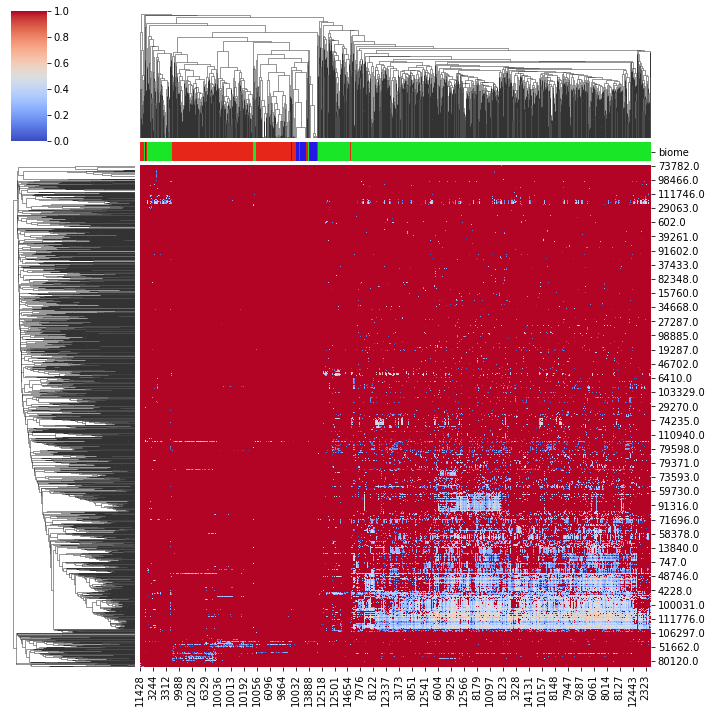

In [19]:
sns.clustermap(log.transpose(),
              # method='ward', #yticklabels=species,
              # method='average', 
               metric="correlation",
               standard_scale=1,
               cmap="coolwarm",
              # cmap="mako", 
              # vmin=-5, vmax=0,
               figsize=(10,10),col_colors=row_colors,
               #z_score=1,
              #row_cluster=False
              )

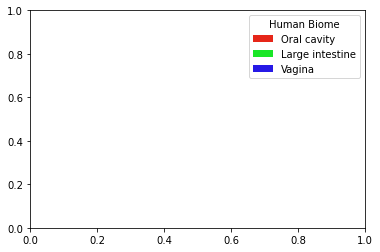

In [15]:
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Human Biome',)

### testing if there are other patterns just from the study names
(there are not)

In [83]:
grouped_hh = hh.drop(['Host_Gender','GOLD Analysis Project ID',
                             'host_sickness', 'Hospital_Visits','Longitude','Latitude', 'Isolation_Country'],axis=1)
grouped_hh = grouped_hh.groupby(by='biome').sum()
grouped_hh = grouped_hh.transpose()
grouped_hh

biome     Engineered:Artificial ecosystem:Unclassified  \
860.0                                         0.106132   
2075.0                                        0.010855   
2135.0                                        0.012340   
4618.0                                        0.000000   
4629.0                                        0.042679   
...                                                ...   
21995.0                                       0.000000   
33206.0                                       0.000000   
32137.0                                       0.000000   
86278.0                                       0.000000   
103472.0                                      0.000000   

biome     Engineered:Bioreactor:Aerobic  \
860.0                          0.068370   
2075.0                         0.003584   
2135.0                         0.004366   
4618.0                         0.000000   
4629.0                         0.024419   
...                                 ...   
21995.0                        0.000000   
33206.0                        0.000000   
32137.0                        0.000000   
86278.0                        0.000000   
103472.0                       0.000000   

biome     Engineered:Bioreactor:Anaerobic-Aerobic  \
860.0                                    0.199165   
2075.0                                   0.004020   
2135.0                                   0.025344   
4618.0                                   0.000000   
4629.0                                   0.006898   
...                                           ...   
21995.0                                  0.000000   
33206.0                                  0.000000   
32137.0                                  0.000000   
86278.0                                  0.000000   
103472.0                                 0.000000   

biome     Engineered:Bioreactor:Digestate  Engineered:Bioreactor:Unclassified  \
860.0                            0.038113                            0.357538   
2075.0                           0.025039                            0.018576   
2135.0                           0.009937                            0.003066   
4618.0                           0.000000                            0.000000   
4629.0                           0.000474                            0.011133   
...                                   ...                                 ...   
21995.0                          0.000000                            0.000000   
33206.0                          0.000000                            0.000000   
32137.0                          0.000000                            0.000000   
86278.0                          0.000000                            0.000000   
103472.0                         0.000000                            0.000000   

biome     Engineered:Built environment:Irrigation canal  \
860.0                                          0.032232   
2075.0                                         0.002236   
2135.0                                         0.008241   
4618.0                                         0.000000   
4629.0                                         0.001206   
...                                                 ...   
21995.0                                        0.000000   
33206.0                                        0.000000   
32137.0                                        0.000000   
86278.0                                        0.000000   
103472.0                                       0.000000   

biome     Engineered:Built environment:Subway  \
860.0                                2.281037   
2075.0                               1.235368   
2135.0                               0.105149   
4618.0                               0.000000   
4629.0                               0.022346   
...                                       ...   
21995.0                              0.000000   
33206.0                              0.000000   
32137.0                   

In [84]:
group_df_transposed_test = grouped_hh.reset_index().fillna(0)
group_df_transposed_test = group_df_transposed_test.loc[:,~(group_df_transposed_test.sum(axis=0) == 0)]
group_df_transposed_test = group_df_transposed_test.rename(columns={'index':'bar'})

#log_test=group_df_transposed_test.drop('bar',axis=1)
log_test = np.log2(group_df_transposed_test.drop('bar',axis=1))
log_test.replace([np.inf, -np.inf], np.nan, inplace=True)
log_test.fillna(0.0, inplace=True)
log_test = log_test.loc[:,~(log_test.sum(axis=0) == 0)]

/global/common/software/nersc/pm-2022q3/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


/tmp/ipykernel_60853/558727397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_human['biome'] = hh_human['biome'].str.split(':').str[3]
/global/common/software/nersc/pm-2022q3/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/global/common/software/nersc/pm-2022q3/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


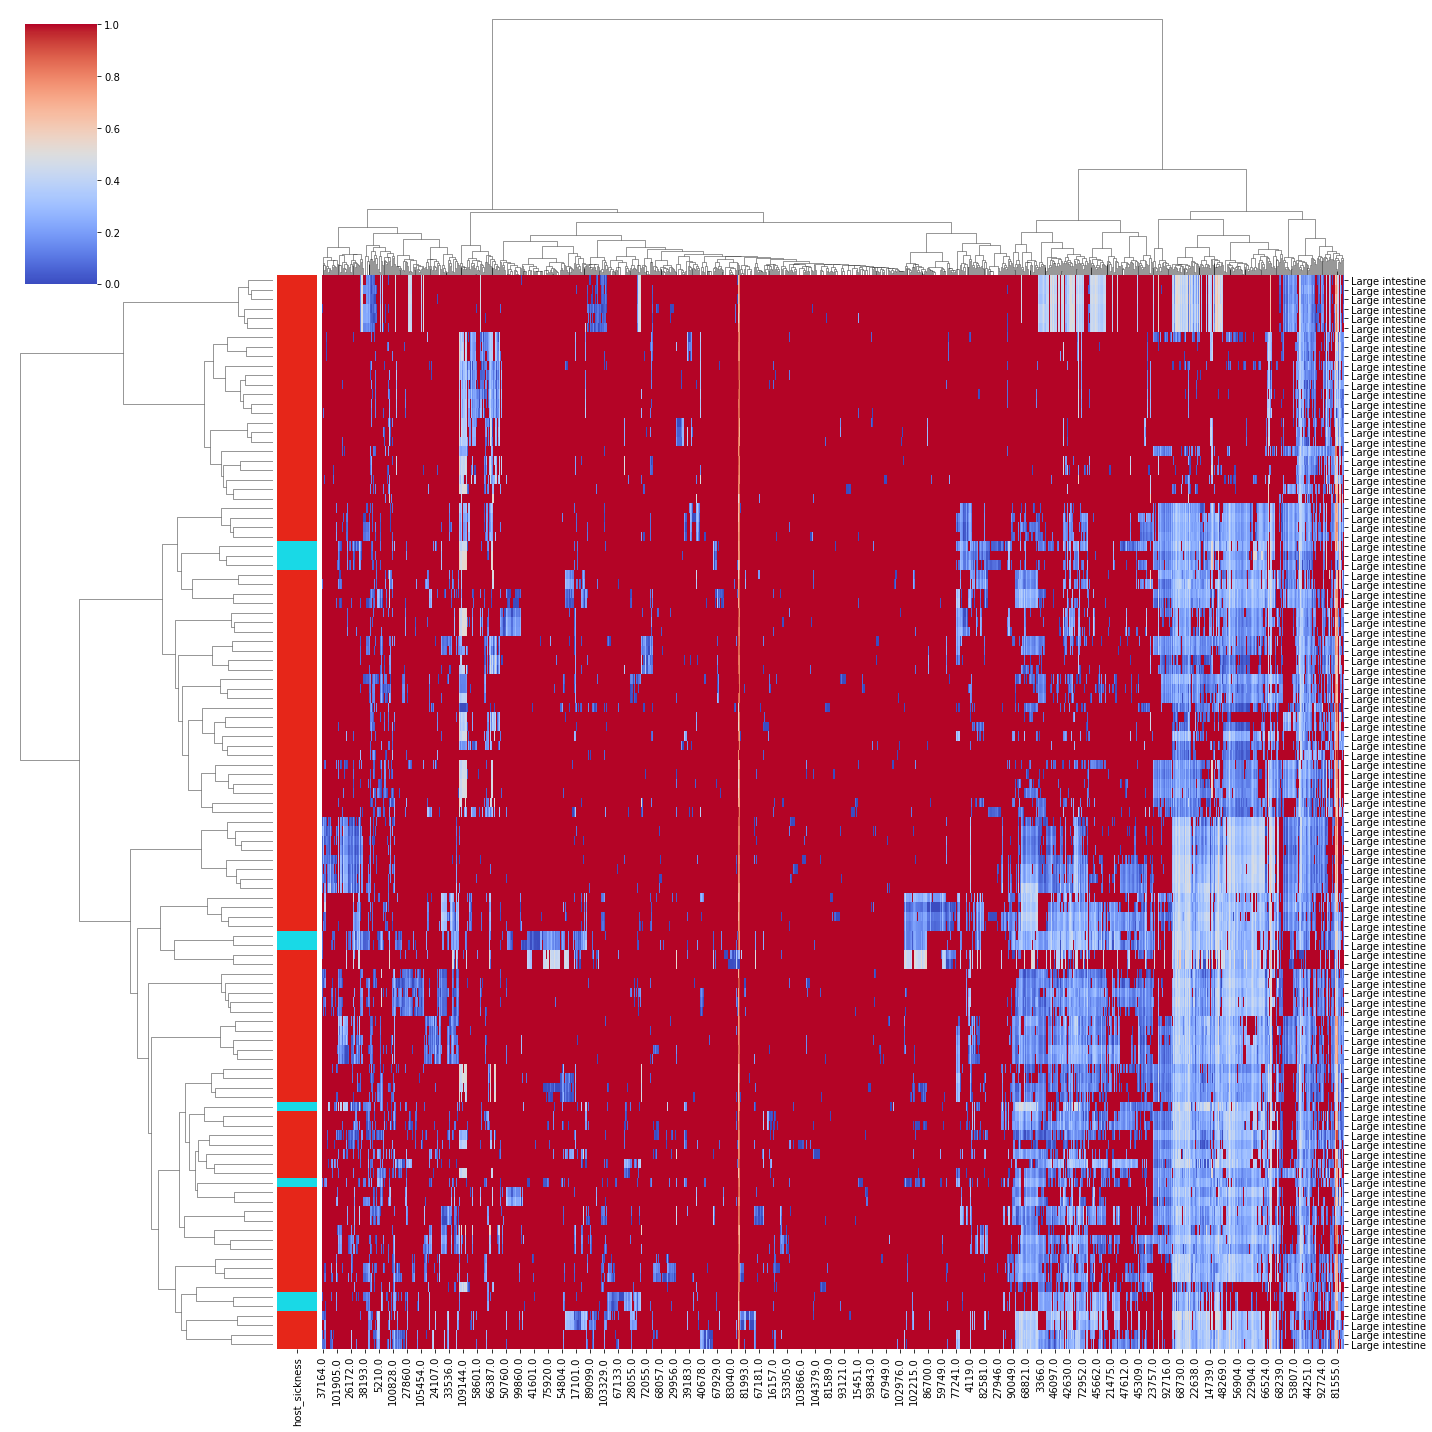

In [70]:
#species = gene_copy_df['biome'].str.split(':').str[0]+gene_copy_df['biome'].str.split(':').str[1]
#species = hh_human['biome'].str.split(':').str[3]
species = hh_human['host_sickness']
hh_human['biome'] = hh_human['biome'].str.split(':').str[3]
lut = dict(zip(species.unique(), sns.hls_palette(len(set(species.unique())), l=0.5, s=0.8)))
row_colors = species.map(lut)

log = np.log2(hh_human.drop(['biome','Host_Gender','GOLD Analysis Project ID',
                             'host_sickness', 'Hospital_Visits','Longitude','Latitude', 'Isolation_Country'],axis=1))
log.replace([np.inf, -np.inf], np.nan, inplace=True)
log.fillna(0.0, inplace=True)
log = log.loc[:,~(log.sum(axis=0) == 0)]

sns.clustermap(log,
               method='ward', yticklabels=hh_human.biome,
               standard_scale=1,cmap="coolwarm",figsize=(20,20),
              row_colors=row_colors)

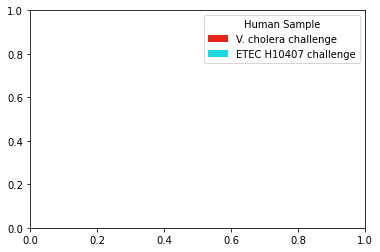

In [71]:
from matplotlib.patches import Patch
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Human Sample',)

# Tree enrichment but with all sensors


In [2]:
#for clustering tree
import json
import numpy as np
import os
import plotly.figure_factory as ff
import plotly.io as pio

from collections import Counter
from collections import defaultdict
from pathlib import Path
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import fdrcorrection

In [3]:
hh = pd.read_csv("/global/cfs/cdirs/kbase/KE-Catboost/HK/mode_0/copy_number_abundance.csv")
hh = hh.drop(['Unnamed: 0',],axis=1)

In [4]:
hh_2 = hh.drop(['GOLD Analysis Project ID',],axis=1)
hh_2 = hh_2.groupby('biome').filter(lambda x : len(x)>30)

In [5]:
hh_2.loc[hh_2.biome == 'Host-associated:Annelida:Unclassified','biome'] = 'Host-associated:Annelida:Digestive tube'
hh_2.loc[hh_2.biome == 'Host-associated:Arthropoda: Insects:Unclassified','biome']='Host-associated:Arthropoda: Insects'
hh_2.loc[hh_2.biome == 'Engineered:WWTP:Unclassified','biome'] = 'Engineered:WWTP'
hh_2.loc[hh_2.biome == 'Engineered:Modeled:Unclassified','biome'] = 'Engineered:Modeled'
hh_2.loc[hh_2.biome == 'Host-associated:Porifera:Unclassified','biome']='Host-associated:Porifera'
hh_2.loc[hh_2.biome == 'Host-associated:Algae:Unclassified','biome']='Host-associated:Algae'
hh_2.loc[hh_2.biome == 'Engineered:Bioreactor:Unclassified','biome']='Engineered:Bioreactor'

#drop unclassified biomes
hh_2 = hh_2[hh_2["biome"].str.contains("Unclassified")==False]

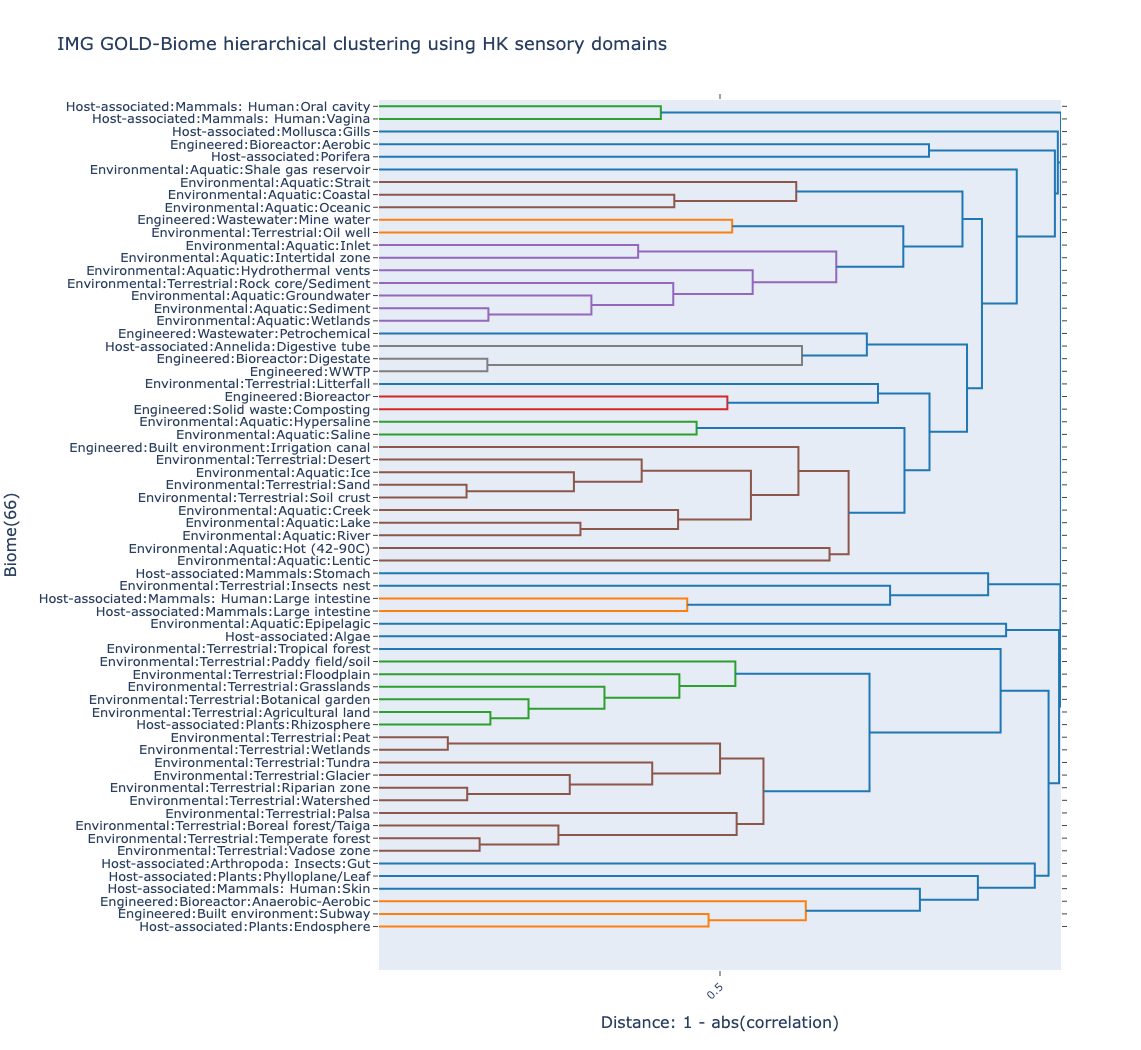

In [7]:
count_tree = ClusteringTree(hh_2)
count_tree.get_clustering_tree()

In [6]:
# from ziming github for clustering tree
class ClusteringTree:
    def __init__(self, data_df, _abs=True, output_path='output'):
        """
        Instance initialization
        :param data_df: dataset, first column is label, e.g. "biome". Rest columns are features
        :type data_df: pandas data framework
        :param _abs: if using abs value for distance. If true, dist = 1 - abs(correlation)
        :type _abs: boolean
        :param output_path: output folder name
        :type output_path: string
        """
        self.data_df = data_df
        self.groupped_data_df = data_df.groupby(['biome']).mean()
        self.correlation_mat = self.groupped_data_df.T.corr()
        self.abs = _abs
        self.output_path = output_path
        Path(output_path).mkdir(exist_ok=True)

    def getZ(self):
        """
        Get Z. Z is a 2d array of shape N x 4. N is the number of clusters.
        4 is [cluster1_idx, cluster2_idx, distance, number of nodes in this cluster]
        :return: Z
        :rtype: 2d array
        """
        if self.abs:
            dissimilarity = 1 - abs(self.correlation_mat)
        else:
            # TODO
            # check later if this is 2
            dissimilarity = 1 - self.correlation_mat
        Z = linkage(squareform(dissimilarity), 'complete')
        return Z

    def biome_root_remover(self):
        """
        remove first "root" term from every biome
        :return: all unique biomes
        :rtype: list
        """
        biome_list = list(self.correlation_mat.columns)
        biome_list_rm_root = []
        total_terms = 0
        for biome in biome_list:
            b = biome.split(":")
            if len(b) == 1:
                total_terms += 1
                biome_list_rm_root.append(b[0])
            else:
                total_terms += len(b[1:])
                new_biome = ":".join([i.capitalize() for i in b[1:]])
                biome_list_rm_root.append(new_biome)
        return biome_list_rm_root

    def get_cluster_dict(self, Z, biome_list):
        """
        Z: [cluster1_idx, cluster2_idx, coordinate, coordinate]
        biome_list: all unique biomes after remove prefix "root"
        """
        nodes_dict = {}
        res = {}
        unique_biome_count = len(Z) + 1
        for iteration in range(len(Z)):
            new_cluster_id = iteration + len(Z) + 1
            cluster_1_id, cluster_2_id = int(Z[iteration][0]), int(Z[iteration][1])

            if cluster_1_id > unique_biome_count-1: # is a merged cluster
                cluster_1_nodes = nodes_dict[cluster_1_id] # is a list
            else:
                cluster_1_nodes = [cluster_1_id]

            if cluster_2_id > unique_biome_count-1:
                cluster_2_nodes = nodes_dict[cluster_2_id] # is a list
            else:
                cluster_2_nodes = [cluster_2_id]

            new_cluster_nodes = cluster_1_nodes + cluster_2_nodes
            nodes_dict[new_cluster_id] = new_cluster_nodes
        for k, v in nodes_dict.items():
            res[k-len(Z)] = [biome_list[i] for i in v]

        file_path = "cluster_biome_dict.json"
        with open(os.path.join(self.output_path, file_path), "w") as outfile:
            json.dump(nodes_dict, outfile)
        return res

    @staticmethod
    def get_contingency_table(cluster, unique_biome_list):
        terms_in_cluster = []
        for biome in cluster:
            terms_in_cluster.extend(biome.split(":"))

        res = {}
        for term, term_cnt in Counter(terms_in_cluster).items():
            if term_cnt <= 1:
                continue
            table = np.zeros((2, 2), dtype=int)
            table[0][0] = sum([1 for biome in cluster if term in biome])
            table[0][1] = len(cluster) - table[0][0]
            table[1][0] = sum([1 for biome in unique_biome_list if term in biome]) - table[0][0]
            table[1][1] = sum([1 for biome in unique_biome_list if term not in biome]) - (len(cluster) - table[0][0])
            res[term] = table
        return res

    def get_cluster_hover_info(self, nodes_dict_biome, unique_biome_list):
        # return res initialization
        cluster_ids, terms, uncorrected_pvalues, term_ratio = [], [], [], []
        cluster_hover_biome_count = {}
        cluster_hover_info = defaultdict(list)

        for cluster_id, cluster in nodes_dict_biome.items():
            tables = self.get_contingency_table(cluster, unique_biome_list)
            cluster_hover_biome_count[cluster_id] = len(cluster)
            for term, table in tables.items():
                oddsr, p = fisher_exact(table)
                cluster_ids.append(cluster_id)
                terms.append(term)
                uncorrected_pvalues.append(p)
                term_ratio.append("{:.1f}%".format((table[0][0] / (table[0][0] + table[1][0]) * 100)))
        # p value correction
        rejected, corrected_p = fdrcorrection(np.array(uncorrected_pvalues))
        np.set_printoptions(suppress=True)

        for i in range(len(terms)):
            cluster_hover_info[cluster_ids[i]].append("{}:{:.8f} ({})".format(terms[i], corrected_p[i], term_ratio[i]))
        return cluster_hover_info, cluster_hover_biome_count

    @staticmethod
    def my_pdist(biome_groupped):
        correlations_biome = biome_groupped.T.corr()
        dissimilarity = 1 - abs(correlations_biome)
        return squareform(dissimilarity)

    @staticmethod
    def my_linkage(dissimilarity):
        return linkage(dissimilarity, 'complete')

    def get_initial_tree(self):
        """
        Initialize a tree structure based on dendrogram using Plotly, at this step all hover info is "Hello World"
        :return: a figure
        :rtype: Plotly figure object
        """
        fig = ff.create_dendrogram(self.groupped_data_df,
                                   orientation='left',
                                   colorscale=[
                                       '#1f77b4',  # muted blue
                                       '#ff7f0e',  # safety orange
                                       '#2ca02c',  # cooked asparagus green
                                       '#d62728',  # brick red
                                       '#9467bd',  # muted purple
                                       '#8c564b',  # chestnut brown
                                       '#e377c2',  # raspberry yogurt pink
                                       '#7f7f7f',  # middle gray
                                       '#bcbd22',  # curry yellow-green
                                       '#17becf'   # blue-teal
                                   ],
                                   distfun=self.my_pdist,
                                   linkagefun=self.my_linkage,
                                   labels=self.groupped_data_df.index)

        fig.update_layout(xaxis=dict(
            tick0=0.5,
            dtick=0.75
        ))
        fig.update_layout(modebar_add="togglespikelines",
                          autosize=False,
                          width=1050,
                          height=1050,
                          paper_bgcolor="rgba(0,0,0,0)", )
        fig.update_xaxes(tickfont_size=11, tickangle=-45)
        # get axises tiles
        if self.abs:
            xaxis_title = "Distance: 1 - abs(correlation)"
        else:
            xaxis_title = "Distance: 1 - correlation"
        biome_cnt = len(self.groupped_data_df.index)
        yaxis_title = "Biome({})".format(biome_cnt)
        fig.update_layout(
            title="IMG GOLD-Biome hierarchical clustering using HK sensory domains",
            xaxis_title=xaxis_title,
            yaxis_title=yaxis_title,
            legend_title="Legend Title",
            font=dict(
                size=13,
            )
        )
        fig.update_traces(hovertemplate='hello world')
        fig.update_traces(name='cluster', selector=dict(type='scatter'))
        return fig

    @staticmethod
    def update_hover_lables(fig_dict, cluster_hover_info, cluster_hover_biome_count):
        """
        This method updates initialized clustering tree with enrichment p value and biome count
        :param fig_dict: Plotly figure object in dictionary format
        :type fig_dict: dict
        :param cluster_hover_info: enrichment and p value
        :type cluster_hover_info: dict
        :param cluster_hover_biome_count: biome count in each cluster
        :type cluster_hover_biome_count: dict
        :return: updated figure
        :rtype: dict
        """
        fig_dict['data'].sort(key=lambda x:max(x['x']))
        for i in range(len((fig_dict['data']))):
            cluster_id = i + 1
            if cluster_id not in cluster_hover_info:
                fig_dict['data'][i]['hovertemplate'] = "No common term"
            else:
                sorted_p = sorted(cluster_hover_info[cluster_id], key=lambda x: x.split(':')[1].split(' ')[0])
                fig_dict['data'][i]['hovertemplate'] = "<br>".join(sorted_p)
            fig_dict['data'][i]['name'] = "cluster {}<br>{} biomes".format(cluster_id,
                                                                           cluster_hover_biome_count[cluster_id])
        return fig_dict

    def get_clustering_tree(self):
        """
        This method calls other methods to create the final clustering tree
        :return: None
        :rtype: None
        """
        # step 1: get Z
        Z = self.getZ()

        # step 2: get cluster info from Z, cluster id and all biomes it includes
        filtered_biome_list = self.biome_root_remover()
        cluster_info_dict = self.get_cluster_dict(Z, filtered_biome_list)

        # step 3: get enrichment and count for each cluster
        cluster_hover_info, cluster_hover_biome_count = self.get_cluster_hover_info(cluster_info_dict,
                                                                                    filtered_biome_list)

        # step 4: initialize a tree using Plotly
        fig = self.get_initial_tree()

        # step 5: update initialized tree with enrichment labels
        fig_dict = fig.to_dict()
        updated_fig_dict = self.update_hover_lables(fig_dict, cluster_hover_info, cluster_hover_biome_count)

        # step 6: save new fig
        pio.show(updated_fig_dict)
        pio.write_html(updated_fig_dict, os.path.join(self.output_path, 'GO_biome_hierarchical_clustering_tree.html'))
        pio.write_json(updated_fig_dict, os.path.join(self.output_path, 'GO_biome_hierarchical_clustering_tree.json'))

# Graphs for % pfam identity

# bar chart - pfam predicted for each cluster

In [155]:
aa = clustered.groupby('bar').filter(lambda x : len(x)>100)

#cluster_abundance = merge_again[['bar', 'pfam_predicted', 'pfam_id', 'sensory_aa','biome', 'biome_predicted']]
cluster_abundance_index = pd.DataFrame(aa.bar.value_counts())
cluster_abundance_index=cluster_abundance_index.rename_axis('cluster').reset_index()
cluster_abundance_index['perc_total'] = 100 * (cluster_abundance_index['bar'].cumsum()
                                            /cluster_abundance_index['bar'].sum()) 

In [156]:
cluster_abundance_index

cluster     bar  perc_total
0       109066  174541    1.053397
1          860  114918    1.746955
2       109311  108163    2.399745
3       106367  107534    3.048739
4        69387   91407    3.600402
...        ...     ...         ...
13497    30312     101   99.997562
13498    57966     101   99.998171
13499    13540     101   99.998781
13500   109523     101   99.999390
13501     5018     101  100.000000

[13502 rows x 3 columns]

In [157]:
cluster_abundance_index.perc_total[99:100]

99    24.516079
Name: perc_total, dtype: float64

In [161]:
df = pd.DataFrame()
count = 0
for child in cluster_abundance_index.cluster:
    if count < 56:
        top_cluster = aa[aa.bar==child].reset_index(drop=True)
        pfam_enrichment = top_cluster[['bar','pfam']]
        pfam_enrichment = pfam_enrichment.groupby('pfam').count()
        pfam_enrichment = pfam_enrichment.reset_index()
        pfam_enrichment['cluster'] = (str(top_cluster['pfam'][0])+" "+str(count))
        df = pd.concat([df, pfam_enrichment])
    else:
        break
    count+=1


In [162]:
alt.Chart(df).mark_bar().encode(
    x='cluster',
    y='bar',
    color='pfam').configure_range(
    category={'scheme':'tableau20'}
)

alt.Chart(...)

In [ ]:
df = pd.DataFrame()
count = 0
for child in cluster_abundance_index.cluster:
    if count < 100:
        top_cluster = cluster_abundance[cluster_abundance.bar==child].reset_index(drop=True)
        pfam_enrichment = top_cluster[['biome','biome_predicted']]
        pfam_enrichment = pfam_enrichment.groupby('biome').count()
        pfam_enrichment = pfam_enrichment.reset_index()
        pfam_enrichment['cluster'] = (top_cluster.biome_predicted[0]+" "+str(count))
        df = pd.concat([df, pfam_enrichment])
    else:
        break
    count+=1

In [ ]:
df['biome'] = df['biome'].str.split(':').str[0]
#df['biome_predicted'] = df['biome_predicted'].str.split(':').str[0]

In [ ]:
alt.Chart(df).mark_bar().encode(
    x='cluster',
    y='biome_predicted',
    color='biome').configure_range(
    category={'scheme':'tableau20'}
)

# HK full protein

In [ ]:
clustered = pd.read_csv('/global/cfs/cdirs/kbase/KE-Catboost/HK/mmseqs/hk_aa_saved_clu.tsv',
                        delimiter='\t', header=None, names=['cluster_base','label_protein'])
cluster_index = clustered['cluster_base'].drop_duplicates()
cluster_index = cluster_index.reset_index(drop=True).rename_axis('bar').reset_index()
cluster_index

In [ ]:
clustered_hk = pd.merge(all_studies_aa, clustered, on='label_protein', how='left')
clustered_hk['biome'] = clustered_hk['Ecosystem Category']+":"+clustered_hk['Ecosystem Subtype']
clustered_hk

In [ ]:
clustered_hk['pfam_predicted'] = clustered_hk['cluster_base'].str.split('-').str[0]
clustered_hk['gene_predicted'] = clustered_hk['cluster_base'].str.split('-').str[1]
clustered_hk = clustered_hk.merge(cluster_index, on='cluster_base', how='left')

In [ ]:
count_pfam_correct = (clustered_hk.gene_predicted == clustered_hk.gene_oid).sum()
print('gene correct: ',count_pfam_correct / len(clustered_hk))
count_pfam_correct = (clustered_hk.pfam_predicted == clustered_hk.pfam_id).sum()
print('pfam correct: ',count_pfam_correct / len(clustered_hk))

In [ ]:
131208/3229635

In [ ]:
cluster_abundance = clustered_hk[['bar', 'pfam_predicted', 'pfam_id', 'sensory_aa','biome']]
cluster_abundance_index = pd.DataFrame(cluster_abundance.bar.value_counts())
cluster_abundance_index=cluster_abundance_index.rename_axis('cluster').reset_index()
cluster_abundance_index['perc_total'] = 100 * (cluster_abundance_index['bar'].cumsum()
                                            /cluster_abundance_index['bar'].sum()) 

In [ ]:
cluster_abundance_index.perc_total[50:56]

In [ ]:
df_2 = pd.DataFrame()
count = 0
for child in cluster_abundance_index.cluster:
    if count < 56:
        top_cluster = cluster_abundance[cluster_abundance.bar==child].reset_index(drop=True)
        pfam_enrichment = top_cluster[['pfam_predicted','pfam_id']]
        pfam_enrichment = pfam_enrichment.groupby('pfam_id').count()
        pfam_enrichment = pfam_enrichment.reset_index()
        pfam_enrichment['cluster'] = (top_cluster.pfam_predicted[0]+" "+str(count))
        df_2 = pd.concat([df_2, pfam_enrichment])
    else:
        break
    count+=1

In [ ]:
alt.Chart(df_2).mark_bar().encode(
    x='cluster',
    y='pfam_predicted',
    color='pfam_id').configure_range(
    category={'scheme':'tableau20'}
)